In [1]:
from sklearn.cluster import KMeans
from semi_supervised_clustering import *

In [2]:
x_train, y_train, x_test, y_test = mnist_data(categorical=True)
Method = CopKMean
rounds = 5

In [3]:
accs = []
percentages = [0.01, 0.05, 0.1, 0.2, 0.5]
for percentage in tqdm(percentages, desc=">> percentages"):
    accs_round = []
    for _ in range(rounds):
        labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(x_train, y_train,
                                                                                              percentage=percentage)
        X = np.concatenate((labeled_data, unlabeled_data), axis=0)
        label_assignments = list(labeled_labels) + list(unlabeled_labels)

        # print(X.shape)
        # print(len(labeled_data), len(labeled_labels))
        # print(set(labeled_labels), set(y_train))

        # clustering
        must_link, cannot_link = Method.labels_to_constraints(labeled_labels)
        cluster_assignments, centroids = Method.fit_transform(X, 10, must_link, cannot_link, verbose=False)

        # Method.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels))
        accs_round.append(clustering_accuracy(label_assignments, cluster_assignments))
    accs.append(accs_round)

100%|██████████| 60/60 [00:00<00:00, 363143.20it/s]

100%|██████████| 60/60 [00:00<00:00, 96978.13it/s]

100%|██████████| 60/60 [00:00<00:00, 635500.61it/s]

100%|██████████| 60/60 [00:00<00:00, 637109.47it/s]

100%|██████████| 300/300 [00:00<00:00, 1238475.59it/s]

100%|██████████| 300/300 [00:00<00:00, 961996.33it/s]

100%|██████████| 300/300 [00:00<00:00, 686465.47it/s]

100%|██████████| 300/300 [00:00<00:00, 1003422.01it/s]

100%|██████████| 600/600 [00:00<00:00, 1476001.41it/s]

100%|██████████| 600/600 [00:00<00:00, 602774.23it/s]

100%|██████████| 600/600 [00:00<00:00, 1008650.26it/s]

100%|██████████| 600/600 [00:00<00:00, 1454671.91it/s]

100%|██████████| 1200/1200 [00:00<00:00, 801842.41it/s]

100%|██████████| 1200/1200 [00:00<00:00, 1476867.61it/s]

100%|██████████| 1200/1200 [00:00<00:00, 1199229.16it/s]

100%|██████████| 1200/1200 [00:00<00:00, 821338.90it/s]

100%|██████████| 3000/3000 [00:00<00:00, 895198.63it/s]

100%|██████████| 3000/3000 [00:00<00:00, 2110518.62it/s]


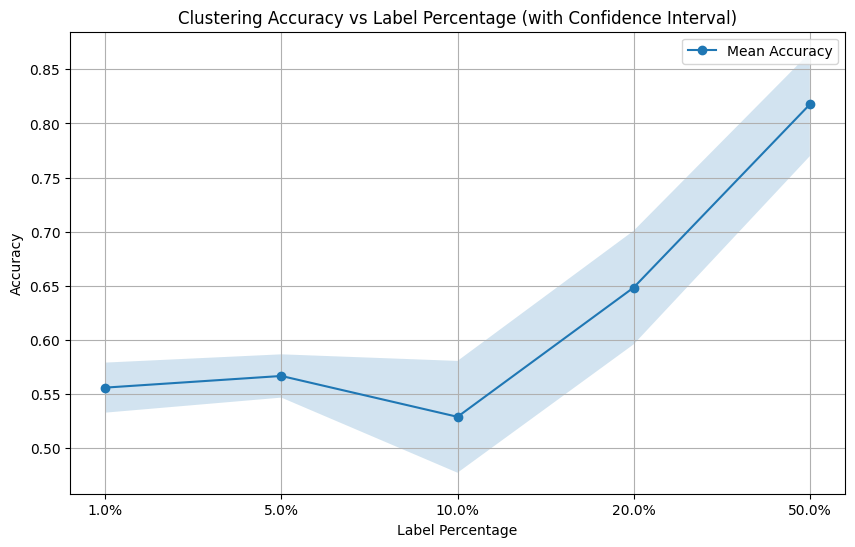

In [6]:
plot_clustering_accs(accs, percentages)